In [1]:
wthr = pd.read_csv("weather3_180703.csv")
wthr['date'] = pd.to_datetime(wthr['date'])
wthr.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing
20512,20,2014-10-27,85.0,66.0,75.5,NaN,59.0,65.0,0.0,11.0,...,27,56.581549,77.610546,NaN,0,0,0,0,0,1
20513,20,2014-10-28,80.0,68.0,74.0,NaN,60.0,65.0,0.0,9.0,...,28,61.651562,76.192928,NaN,1,0,0,0,0,1
20514,20,2014-10-29,78.0,55.0,66.5,NaN,47.0,56.0,0.0,2.0,...,29,49.457615,67.292021,NaN,2,0,0,0,0,1
20515,20,2014-10-30,80.0,52.0,66.0,NaN,50.0,57.0,0.0,1.0,...,30,56.299244,67.042393,NaN,3,0,0,0,0,1
20516,20,2014-10-31,68.0,50.0,59.0,NaN,39.0,50.0,6.0,0.0,...,31,47.379814,56.913195,NaN,4,0,0,0,0,1


station_nbr : 0 ( 0.0 % )
date : 0 ( 0.0 % )
tmax : 822 ( 4.01 % )
tmin : 822 ( 4.01 % )
tavg : 822 ( 4.01 % )
depart : 11451 ( 55.81 % )
dewpoint : 446 ( 2.17 % )
wetbulb : 852 ( 4.15 % )
heat : 822 ( 4.01 % )
cool : 822 ( 4.01 % )
sunrise : 9656 ( 47.06 % )
sunset : 9656 ( 47.06 % )
codesum : 0 ( 0.0 % )
snowfall : 6670 ( 32.51 % )
preciptotal : 822 ( 4.01 % )
stnpressure : 852 ( 4.15 % )
sealevel : 1482 ( 7.22 % )
resultspeed : 446 ( 2.17 % )
resultdir : 589 ( 2.87 % )
avgspeed : 822 ( 4.01 % )
year : 0 ( 0.0 % )
month : 0 ( 0.0 % )
day : 0 ( 0.0 % )
relative_humility : 826 ( 4.03 % )
windchill : 822 ( 4.01 % )
daytime : 9656 ( 47.06 % )
week7 : 0 ( 0.0 % )
weekend : 0 ( 0.0 % )
code_change : 0 ( 0.0 % )
rainY : 0 ( 0.0 % )
otherY : 0 ( 0.0 % )
nothing : 0 ( 0.0 % )


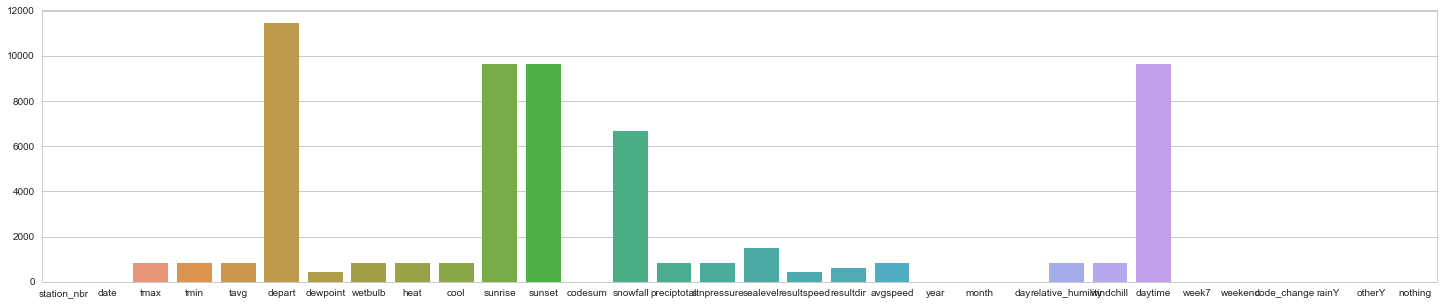

In [2]:
dic = {}    
    
for i in wthr.columns:
    count_null = wthr[i].isna().sum()
    print(i, ":", count_null, "(",round((count_null / len(wthr) * 100),2),"%",")")
    dic[i] = count_null

plt.figure(figsize=(25,5))    
sns.barplot(x=list(dic.keys()), y=list(dic.values()))
plt.show()

In [3]:
wthr.daytime.unique()

array([         nan,   9.16666667,   9.18333333,   9.2       ,
         9.21666667,   9.23333333,   9.25      ,   9.28333333,
         9.3       ,   9.31666667,   9.35      ,   9.36666667,
         9.38333333,   9.41666667,   9.43333333,   9.46666667,
         9.5       ,   9.53333333,   9.55      ,   9.58333333,
         9.61666667,   9.65      ,   9.68333333,   9.71666667,
         9.75      ,   9.78333333,   9.81666667,   9.85      ,
         9.9       ,   9.93333333,   9.96666667,  10.        ,
        10.05      ,  10.08333333,  10.11666667,  10.16666667,
        10.2       ,  10.25      ,  10.3       ,  10.33333333,
        10.36666667,  10.41666667,  10.46666667,  10.5       ,
        10.55      ,  10.6       ,  10.63333333,  10.68333333,
        10.71666667,  10.78333333,  10.81666667,  10.85      ,
        10.9       ,  10.95      ,  11.        ,  11.05      ,
        11.08333333,  11.15      ,  11.18333333,  11.25      ,
        11.23333333,  11.26666667,  11.31666667,  11.38

In [2]:
rain_text = ['FC', 'TS', 'GR', 'RA', 'DZ', 'SN', 'SG', 'GS', 'PL', 'IC', 'FG', 'BR', 'UP', 'FG+']
other_text = ['HZ', 'FU', 'VA', 'DU', 'DS', 'PO', 'SA', 'SS', 'PY', 'SQ', 'DR', 'SH', 'FZ', 'MI', 'PR', 'BC', 'BL', 'VC' ]

In [16]:
wthr['rainY'] = 0
idx_ls = []
for txt in rain_text:
    for idx in wthr.index.values:
        if txt in wthr.loc[idx, "codesum"]:
            idx_ls.append(idx)

In [17]:
wthr.loc[idx_ls, "rainY"] = 1

In [20]:
wthr['otherY'] = 0
idx_ls = []
for txt in other_text:
    for idx in wthr.index.values:
        if txt in wthr.loc[idx, "codesum"]:
            idx_ls.append(idx)

In [21]:
wthr.loc[idx_ls, "otherY"] = 1

In [22]:
wthr['nothing'] = 0
idx_ls = []

for idx in wthr.index.values:
    if "MD" in wthr.loc[idx, "codesum"]:
        idx_ls.append(idx)

In [23]:
wthr.loc[idx_ls, "nothing"] = 1

In [24]:
wthr.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing
20512,20,2014-10-27,85.0,66.0,75.5,NaN,59.0,65.0,0.0,11.0,...,27,56.581549,77.610546,NaN,0,0,0,0,0,1
20513,20,2014-10-28,80.0,68.0,74.0,NaN,60.0,65.0,0.0,9.0,...,28,61.651562,76.192928,NaN,1,0,0,0,0,1
20514,20,2014-10-29,78.0,55.0,66.5,NaN,47.0,56.0,0.0,2.0,...,29,49.457615,67.292021,NaN,2,0,0,0,0,1
20515,20,2014-10-30,80.0,52.0,66.0,NaN,50.0,57.0,0.0,1.0,...,30,56.299244,67.042393,NaN,3,0,0,0,0,1
20516,20,2014-10-31,68.0,50.0,59.0,NaN,39.0,50.0,6.0,0.0,...,31,47.379814,56.913195,NaN,4,0,0,0,0,1


In [25]:
wthr.to_csv("weather3_180703.csv", index=False)

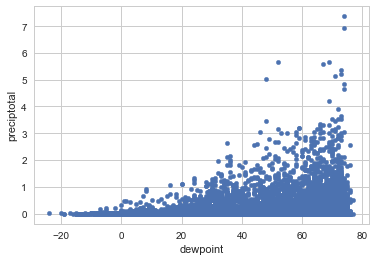

In [7]:
wthr.plot.scatter('dewpoint','preciptotal')
plt.show()

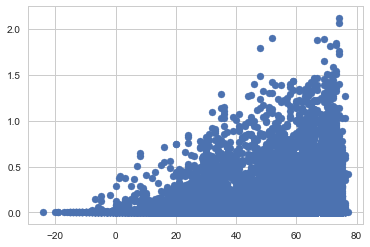

In [25]:
plt.scatter((wthr['dewpoint']) ,np.log1p(wthr['preciptotal']))
plt.show()

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
cols = ['tmax','tmin','tavg','']
wthr2 = wthr.loc[:,[]]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(wthr.values, i) for i in range(wthr.shape[1])]
vif["features"] = wthr.columns
vif

TypeError: unsupported operand type(s) for -: 'str' and 'str'